In [1]:
# Natural Language Processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
dataset = pd.read_csv('Airline.csv')

In [2]:
dataset.head()

,tweet_id,airline_sentiment,text
0,570306133677760000,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122000,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813000,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624000,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462000,negative,@VirginAmerica and it's a really big bad thing...


In [3]:
dataset.shape

(14640, 3)

In [4]:
#Check if any missing data
dataset.isnull().sum()

tweet_id             0
airline_sentiment    0
text                 0
dtype: int64

In [5]:
#See review at loc 2
dataset['text'][2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [6]:
## One Hot Encoding the "airline_sentinent" column, use as output y
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
##airline_sentinent is at column index 1
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
#y = ct.fit_transform(y)

In [7]:
# Text Preprocessing 
# remove punctuation
# remove stop words
# Stemming 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 14640):
    #remove non-alphabet, any non-alphabet, []
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    #all text become lowercase
    review = review.lower()
    review = review.split()
    #example taught -> teach,   is, are -> be
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    #use 'set' to include only Unique words
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus[2]

'virginamerica today must mean need take anoth trip'

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# Create Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
#Output is "airline_sentinent"
y = dataset['airline_sentiment']
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [12]:
# input x is the term frequency calculated
x.shape

(14640, 1500)

In [13]:
# Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11712, 1500), (2928, 1500), (11712,), (2928,))

In [15]:
# Training the Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [18]:
# Build a Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',    #may change ginin to entropy to observe
                                     max_depth=4,
                                 random_state=100)
#Train the decision tree with training data
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# create logistic regression model
classifier = LogisticRegression()
# train the model with data
classifier.fit(x_train, y_train)

C:\Users\brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Cant run

# Support Vector, linear hyperplane to classify data, or non-linear, or a trick is convert data from 2 to 3 dimensional space 
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#create support vector machine model
classifier = svm.SVC(kernel='linear')
#train the model with data
classifier.fit(x_train, y_train)

KeyboardInterrupt: 

In [22]:
y_pred = classifier.predict(x_test)
y_pred

array(['negative', 'positive', 'negative', ..., 'negative', 'negative',
       'neutral'], dtype=object)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.7701502732240437


In [24]:
cm

array([[1573,  136,   72],
       [ 248,  370,   62],
       [  90,   65,  312]], dtype=int64)

<AxesSubplot:>

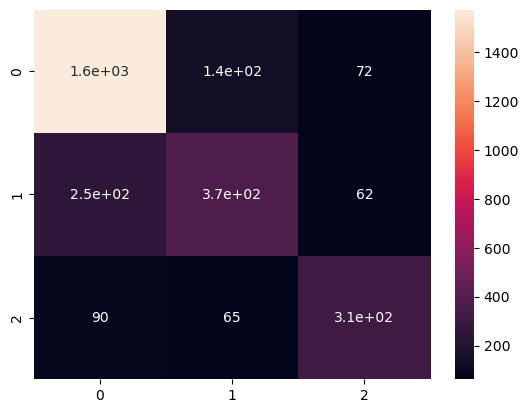

In [25]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# Multi class confusion matrix (3x3)
# 3 Predicted field values * 3 Actual field values